# Examen final Módulo 5

## Andrés Nieto Guadarrama

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [174]:
df_precios=pd.read_excel(r"C:\Users\AN012491\Desktop\Prueba.xlsx","Precios",index_col=0)
rends=df_precios.pct_change().dropna(axis=0)
rends_anual=df_precios.pct_change(periods=252).dropna(axis=0)

In [175]:
rends.head()

,KIMBERA MF Equity,GAPB MF Equity,CEMEXCPO MF Equity,ASURB MF Equity,GFNORTEO MF Equity,KOFUBL MF Equity,AC* MF Equity,LABB MF Equity,FEMSAUBD MF Equity,OMAB MF Equity,...,MEGACPO MF Equity,GCC* MF Equity,BIMBOA MF Equity,GMEXICOB MF Equity,GCARSOA1 MF Equity,TLEVICPO MF Equity,ALFAA MF Equity,BSMXB MF Equity,PINFRA* MF Equity,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2017-06-08,0.021310,-0.006157,0.015489,-0.010401,-0.013458,-0.008074,-0.042311,0.006852,-0.011419,-0.001199,...,-0.002221,0.004935,0.001732,-0.005342,0.008094,-0.007527,0.010765,-0.010177,-0.003959,-0.003805
2017-06-09,-0.009016,-0.010074,0.025015,0.007274,-0.003226,-0.006642,-0.005936,-0.008082,-0.010631,0.000100,...,0.000974,0.007143,-0.009726,0.006167,-0.012999,-0.002830,-0.004774,-0.002056,-0.004337,-0.000117
2017-06-12,0.018196,0.017088,0.002381,-0.018617,0.012391,-0.000656,0.001361,-0.011578,-0.004414,-0.001701,...,0.007228,-0.002660,0.024007,-0.013049,0.005939,0.007492,0.004797,0.008831,0.006326,0.000958
2017-06-13,-0.012254,0.019637,-0.006532,0.006407,0.007581,-0.016006,0.017286,-0.003905,-0.000292,0.013226,...,0.000552,-0.002222,-0.016837,-0.000200,-0.006546,0.003718,-0.005141,0.018675,0.020146,-0.002075
2017-06-14,0.013699,0.014903,0.000000,0.010676,0.001904,0.001133,-0.007568,0.001307,0.002918,0.024426,...,0.003862,-0.000668,0.013657,0.003005,0.012791,-0.001010,0.001477,0.006875,0.018132,0.005389


Consideraremos las siguientes acciones: (Aquellas con el mayor rendimiento pormedio del IPyC)

In [176]:
acciones = list(rends.mean().sort_values(ascending=False).keys())[0:7]
datos=rends[acciones]
datos_anual=rends_anual[acciones]
acciones

['ELEKTRA* MF Equity',
 'OMAB MF Equity',
 'BOLSAA MF Equity',
 'WALMEX* MF Equity',
 'GAPB MF Equity',
 'GCC* MF Equity',
 'GMEXICOB MF Equity']

y los siguientes parámetros:

In [177]:
rf=5/100
market_premium=10/100
A=3

## Pregunta 1 

### Modelo de rendimientos constantes

In [178]:
#Rendimientos diarios
Ep=datos.mean()
Ep

ELEKTRA* MF Equity    0.000987
OMAB MF Equity        0.000648
BOLSAA MF Equity      0.000579
WALMEX* MF Equity     0.000493
GAPB MF Equity        0.000421
GCC* MF Equity        0.000262
GMEXICOB MF Equity    0.000260
dtype: float64

In [179]:
#Rendimientos anuales
Ep_anual=Ep*252
Ep_anual

ELEKTRA* MF Equity    0.248633
OMAB MF Equity        0.163220
BOLSAA MF Equity      0.145841
WALMEX* MF Equity     0.124216
GAPB MF Equity        0.105969
GCC* MF Equity        0.065943
GMEXICOB MF Equity    0.065446
dtype: float64

### Modelo CAPM

Rendimientos esperados:
$$r_i\,=\,r_f + \beta_i (r_M - r_f)$$
para i in $\lbrace emisora_1,...,emisora_7 \rbrace$.

#### 1. Rendimientos diarios

In [180]:
Phi = datos.values
t = rends.iloc[:, [-1]]
N, M = Phi.shape

I = np.concatenate([np.identity(M)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

P = np.ones((N, M))
P = np.c_[P, Phi]

W = np.linalg.inv((P.T @ P) * I) @ P.T @ t
W=W.iloc[M:len(W)]
W["emisora"]  = np.concatenate([datos.columns])
W["param"] = ["beta"] * M
B = W.pivot_table(index="emisora", columns="param", values="MEXBOL INDEX")
betas=[B['beta'][a] for a in acciones]
rend_esperado=[rf+b*market_premium for b in betas]
categoria=["defensiva" if b<1 else "agresiva" for b in betas]
resp=pd.DataFrame({"emisora":acciones,"beta":betas,"rendimiento esperado diario":rend_esperado,"Categoría":categoria})
resp.sort_values("beta", ascending=False)

,emisora,beta,rendimiento esperado diario,Categoría
3,WALMEX* MF Equity,0.294421,0.079442,defensiva
4,GAPB MF Equity,0.287803,0.078780,defensiva
1,OMAB MF Equity,0.272023,0.077202,defensiva
6,GMEXICOB MF Equity,0.265880,0.076588,defensiva
5,GCC* MF Equity,0.213326,0.071333,defensiva
2,BOLSAA MF Equity,0.171829,0.067183,defensiva
0,ELEKTRA* MF Equity,0.093265,0.059326,defensiva


#### 2. Rendimientos anuales

In [181]:
Phi = datos_anual.values*252
t = rends_anual.iloc[:, [-1]]*252
N, M = Phi.shape

I = np.concatenate([np.identity(M)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

P = np.ones((N, M))
P = np.c_[P, Phi]

W = np.linalg.inv((P.T @ P) * I) @ P.T @ t
W=W.iloc[M:len(W)]
W["emisora"]  = np.concatenate([datos.columns])
W["param"] = ["beta"] * M
B = W.pivot_table(index="emisora", columns="param", values="MEXBOL INDEX")
betas=[B['beta'][a] for a in acciones]
rend_esperado=[rf+b*market_premium for b in betas]
categoria=["defensiva" if b<1 else "agresiva" for b in betas]
resp=pd.DataFrame({"emisora":acciones,"beta":betas,"rendimiento esperado anual":rend_esperado,"Categoría":categoria})
resp.sort_values("beta", ascending=False)

,emisora,beta,rendimiento esperado anual,Categoría
2,BOLSAA MF Equity,0.451818,0.095182,defensiva
3,WALMEX* MF Equity,0.323488,0.082349,defensiva
1,OMAB MF Equity,0.298361,0.079836,defensiva
6,GMEXICOB MF Equity,0.284706,0.078471,defensiva
4,GAPB MF Equity,0.274412,0.077441,defensiva
5,GCC* MF Equity,0.133496,0.063350,defensiva
0,ELEKTRA* MF Equity,-0.023547,0.047645,defensiva


#### Matriz Varianzas y Covarianzas rendimientos diarios

In [182]:
datos.cov()

,ELEKTRA* MF Equity,OMAB MF Equity,BOLSAA MF Equity,WALMEX* MF Equity,GAPB MF Equity,GCC* MF Equity,GMEXICOB MF Equity
ELEKTRA* MF Equity,0.000318,0.000037,0.000004,0.000030,0.000012,0.000007,0.000013
OMAB MF Equity,0.000037,0.000262,0.000033,0.000065,0.000141,0.000032,0.000075
BOLSAA MF Equity,0.000004,0.000033,0.000266,0.000027,0.000052,0.000038,0.000053
WALMEX* MF Equity,0.000030,0.000065,0.000027,0.000219,0.000044,0.000031,0.000053
GAPB MF Equity,0.000012,0.000141,0.000052,0.000044,0.000238,0.000038,0.000076
GCC* MF Equity,0.000007,0.000032,0.000038,0.000031,0.000038,0.000171,0.000052
GMEXICOB MF Equity,0.000013,0.000075,0.000053,0.000053,0.000076,0.000052,0.000318


#### Matriz Varianzas y Covarianzas rendimientos anuales

In [183]:
252*datos.cov()

,ELEKTRA* MF Equity,OMAB MF Equity,BOLSAA MF Equity,WALMEX* MF Equity,GAPB MF Equity,GCC* MF Equity,GMEXICOB MF Equity
ELEKTRA* MF Equity,0.080049,0.009260,0.000966,0.007528,0.003139,0.001810,0.003371
OMAB MF Equity,0.009260,0.066077,0.008362,0.016330,0.035602,0.008124,0.018850
BOLSAA MF Equity,0.000966,0.008362,0.066925,0.006733,0.013118,0.009606,0.013381
WALMEX* MF Equity,0.007528,0.016330,0.006733,0.055269,0.010998,0.007909,0.013334
GAPB MF Equity,0.003139,0.035602,0.013118,0.010998,0.059913,0.009630,0.019067
GCC* MF Equity,0.001810,0.008124,0.009606,0.007909,0.009630,0.043118,0.013152
GMEXICOB MF Equity,0.003371,0.018850,0.013381,0.013334,0.019067,0.013152,0.080108


## Pregunta 2

### Funciones de rendimiento esperado y volatilidad de un portafolio

In [184]:
def mean_port(w,r):
    Ep=(np.array(r["rendimiento esperado anual"])@w)
    return Ep

def ds_port(w,r):
    Sp=np.sqrt(w.T@(r.cov()*252)@w)
    return Sp

## Graficación

### Simulación de pesos 

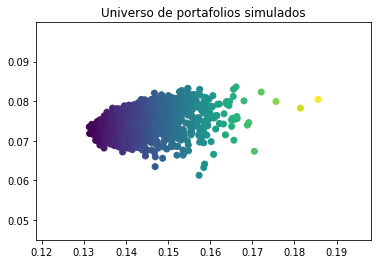

In [185]:
'''
_____________________________________ Universo de portafolios simulados ________________________________________________

'''
rend=rends[acciones]
np.random.seed(12345)
f,c=rend.shape
n_sim=1000
w_sim=np.random.rand(n_sim,c)

for i in range(n_sim):
    w_sim[i]=w_sim[i]/sum(w_sim[i])

rend_sim=[mean_port(W,resp) for W in w_sim]
ds_sim=[ds_port(W,rend) for W in w_sim]
plt.scatter(ds_sim,rend_sim,c=ds_sim, cmap='viridis')
plt.title('Universo de portafolios simulados')
plt.show()

A continuación mostramos como calcular los portafolios de mínima varianza y que maximizan el radio de Sharpe dado un nivel de rendimiento esperado. Se usará éste método para construir la frontera eficiente de portafolios que maximicen el radio para un intervalo de rendimientos esperados.

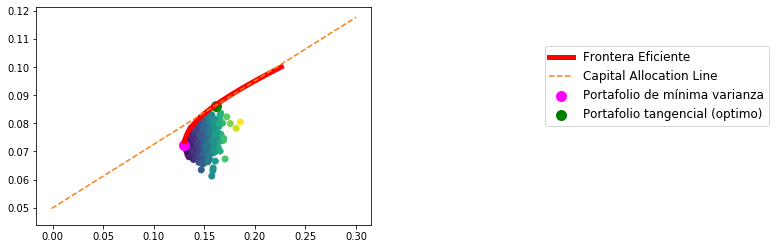

In [186]:
w0=w_sim[ds_sim.index(min(ds_sim))]
pesos_fronteraEf=[]

#Paso 1. Portafolio de mínima varianza:
def sum_w(w):
    return w.sum()-1

constrains=[{"type":"eq","fun":sum_w}]
port=minimize(ds_port,x0=w0,constraints=constrains,args=rend)
w1=port.x

rend_port=mean_port(w1,resp)
sigma_port=ds_port(w1,rend)

#Paso 2. Portafolio que maximiza el sharpe-ratio dado un rendimiento esperado fijo:

def rend_esp(w,E):
    return mean_port(w,resp)-E

rango_fronteraEf=np.linspace(rend_sim[ds_sim.index(min(ds_sim))],0.1,50)
constrains2=[{"type":"eq","fun":sum_w},{"type":"eq","fun":lambda w:rend_esp(w,e0)}]

for e in rango_fronteraEf:
    constrains2=[{"type":"eq","fun":sum_w},{"type":"eq","fun":lambda w:rend_esp(w,e)}]
    port1=minimize(ds_port,x0=w0,constraints=constrains2,args=rend)
    pesos_fronteraEf.append(port1.x)

dominio_fronteraEf=[ds_port(p,rend) for p in pesos_fronteraEf]

#Paso 3: Portafolio Tangencial (maximiza radio Sharpe)

constrains_sharpe=[{"type":"eq","fun":sum_w},{"type":"ineq","fun":lambda wx:1-wx},{"type":"ineq","fun":lambda wx:wx}]

def min_func_sharpe(w):
    return - (mean_port(w, resp) - rf) / ds_port(w, rend)

f_sharpe = minimize(min_func_sharpe, x0=w0, constraints=constrains_sharpe)
dominio_fronteraEf=[ds_port(p,rend) for p in pesos_fronteraEf]
#Graficación:

w_sharpe=f_sharpe.x
e_sharpe = mean_port(w_sharpe, resp)
vol_sharpe = ds_port(w_sharpe, rend)

sigma_c =  np.linspace(-1e-3, 0.3)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.scatter(ds_sim,rend_sim,c=ds_sim, cmap='viridis')
plt.scatter(sigma_port,rend_port,linewidth=5,color='magenta',label="Portafolio de mínima varianza")
plt.plot(dominio_fronteraEf,rango_fronteraEf,color="red",linewidth=5,label="Frontera Eficiente")
plt.scatter(vol_sharpe,e_sharpe,linewidth=5,color='green',label="Portafolio tangencial (optimo)")
plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.legend(fontsize=12,bbox_to_anchor =(1.5,.85))
plt.show()

### Obtención del portafolio óptimo dado el nivel de aversión al riesgo

Proporción del portafolio en activos de riesgo: 46.67%
Proporción del portafolio en activos libres de riesgo: 53.33%


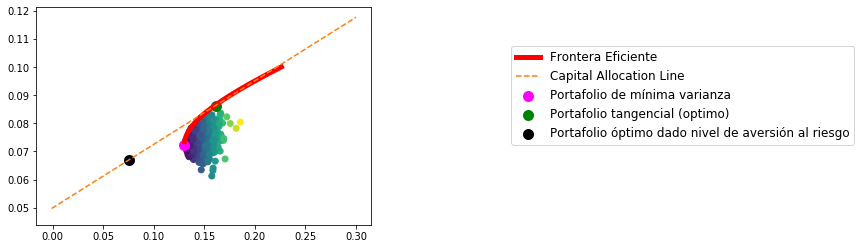

In [187]:
y=(e_sharpe-rf)/(A*vol_sharpe**2)
print(f"Proporción del portafolio en activos de riesgo: {round(100*y,2)}%")
print(f"Proporción del portafolio en activos libres de riesgo: {round(100*(1-y),2)}%")
e_optm=y*e_sharpe+(1-y)*rf
vol_optm=y*vol_sharpe
plt.scatter(ds_sim,rend_sim,c=ds_sim, cmap='viridis')
plt.scatter(sigma_port,rend_port,linewidth=5,color='magenta',label="Portafolio de mínima varianza")
plt.plot(dominio_fronteraEf,rango_fronteraEf,color="red",linewidth=5,label="Frontera Eficiente")
plt.scatter(vol_sharpe,e_sharpe,linewidth=5,color='green',label="Portafolio tangencial (optimo)")
plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.scatter(vol_optm,e_optm,linewidth=5,color='black',label="Portafolio óptimo dado nivel de aversión al riesgo")
plt.legend(fontsize=12,bbox_to_anchor =(1.40,.85))
plt.show()

## Preguntas Deep Learning 

6. ¿En qué escenarios ocuparías una red neuronal?

    a. Detección de patrones

    b. Reconocimiento de imágenes

En fin, para problemas para los que no se cuenta con un gran número de registros pero se requieran hacer muchas transformaciones intermedias para encontrar el mejor modelo posible (llevando a mayores $R^2$ que los modelos obrenidos mediante otras herramientas)

7. ¿En qué escenarios no ocuparías una red neuronal?

Donde contemos con una gran cantidad de información, ya que esto exigiría mayor poder de procesamiento y alentaría el código. En estos casos convendría usar otros métodos de aprendizaje de máquina (árboles de decisión, clasificadores, etc.). 

8. Menciona tres funciones de activación para una red neuronal feed-forward

ReLU, Tangente Hiperbólica y Sigmoide.

9. ¿Qué es el método de backpropagation?

Es un algoritmo que permite entrenar a los pesos en cada capa dentro de una red neuronal a través del cómputo más eficiente de las derivadas parciales $\frac{\partial C}{\partial w_j}$ y $\frac{\partial C}{\partial b}$ en términos del cambio de la función de costos respecto al resultado que arroja la activación de las capas anteriores $a_{1},...,a_{j-1}$, donde $C$ es la función de costos, $w$ son los pesos (coeficientes) del modelo y $b$ es el sesgo. En algunos casos se ejecuta más rápido que los métodos de gradiente descendiente por separado.

10. ¿En qué difiere una red neuronal feed-forward de una red neuronal convolucional?

    
    a. Red neuronal feed-forward: El output de una capa se usa como input de la siguiente. Esto evita que haya loops de la información, lo que evita que la salida de las capa $j$ se usada en las capas $1,2,...,j-1$.
    
    b. Red nuronal convolusional: A contrario de una red $feed-forward$, permite que las salidas de las capas posteriores pueda regresar a las primeras capas, creando loops en la información.